<a href="https://colab.research.google.com/github/Pakhi27/Iris-Dataset-KNN-Classifier/blob/main/Iris_Dataset_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import load_iris

In [8]:
X, y=load_iris(return_X_y=True)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=["sepal-length","sepal-width","petal-length","petal-width","class"]
dataset=pd.read_csv(url,names=names)

In [11]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Exploratory Data Analysis

In [12]:
dataset.isnull()

,sepal-length,sepal-width,petal-length,petal-width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


<Axes: >

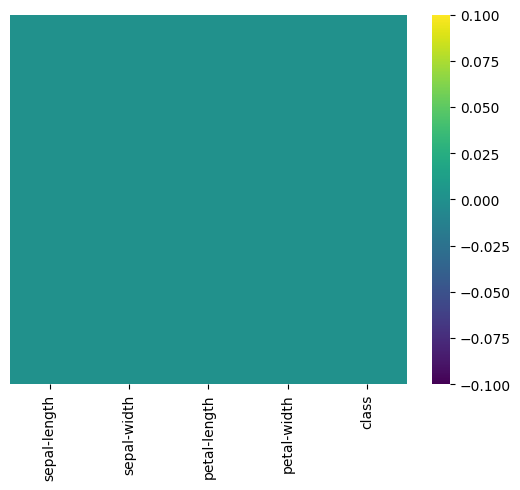

In [13]:
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='viridis')

In [14]:
missing_values_count = dataset.isnull().sum()

print(missing_values_count)

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64


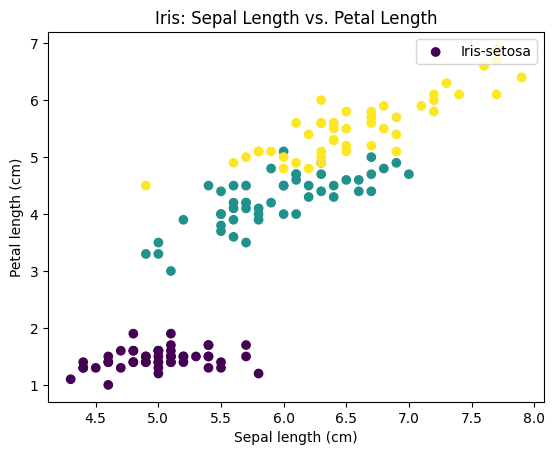

In [15]:
iris = load_iris()


sepal_length = iris.data[:, 0]
petal_length = iris.data[:, 2]
species = iris.target

plt.scatter(sepal_length, petal_length, c=species)


plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.title("Iris: Sepal Length vs. Petal Length")


unique_species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


plt.legend(unique_species_names, loc='upper right')



plt.show()

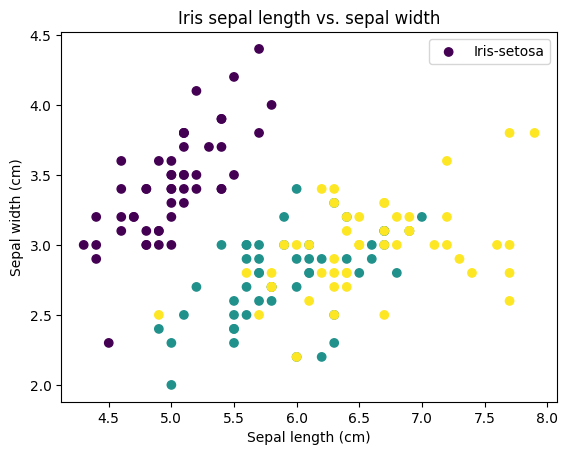

In [16]:
iris = load_iris()


sepal_length = iris.data[:, 0]
sepal_width = iris.data[:, 1]
species = iris.target


plt.scatter(sepal_length, sepal_width,c=species)


plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Iris sepal length vs. sepal width")

unique_species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


plt.legend(unique_species_names, loc='upper right')


plt.show()

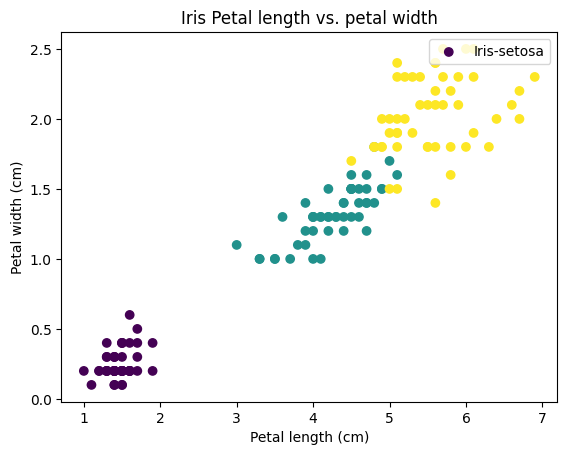

In [18]:
petal_length = iris.data[:, 2]
petal_width = iris.data[:, 3]
species=iris.target


plt.scatter(petal_length, petal_width,c=species)


plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Iris Petal length vs. petal width")

unique_species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


plt.legend(unique_species_names, loc='upper right')


plt.show()

In [19]:
pd.get_dummies(dataset['class'],drop_first=True)

,Iris-versicolor,Iris-virginica
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
145,False,True
146,False,True
147,False,True
148,False,True


In [ ]:
# Building a KNN Classifier Mode

In [20]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,4].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred=classifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [28]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
# Grid Search CV

In [29]:
# Pipelines allow you to chain together data preprocessing steps (like scaling) and a machine learning model into a single unit.
mod=KNeighborsClassifier().fit(X, y)
pipe=Pipeline([('scale',StandardScaler()),('model',KNeighborsClassifier(n_neighbors=1))])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [30]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=1))])

In [31]:
pred=pipe.predict(X)

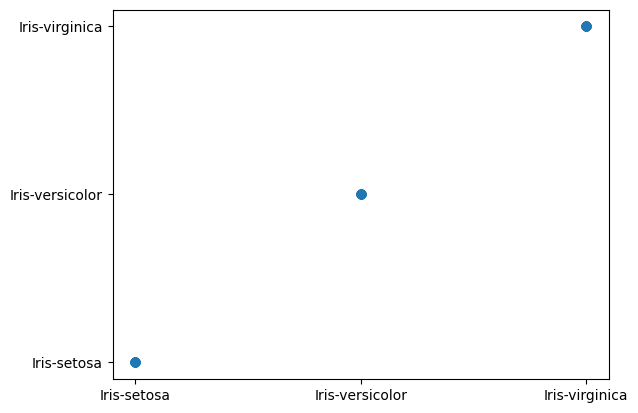

In [32]:
plt.scatter(pred,y)

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [35]:
# divide dataset into 3 parts use specific parts for traing and prediction and repeat the dataset 3 times.
mod=GridSearchCV(estimator=pipe,param_grid=param_grid, cv=3)

In [37]:
mod.fit(X, y);
pd.DataFrame(mod.cv_results_)
mod.best_params_
# {'model__n_neighbors': 3}  # This indicates 3 was the best value for n_neighbors

{'model__n_neighbors': 7}